<a href="https://colab.research.google.com/github/SridharChapparbande/Data-Science/blob/main/Call_of_duty_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT: UNSUPERVISED MACHINE LEARNING ALGORITHMS:**

**Attrubutes/Variable Information:**

1.name: Name for each player

2.wins : number of times the player win a match

3.kills : number of kills the player made in all his matches

4.kdRatio : kill/deaths ratio that means, if a player has 10 kills and 5 deaths, his KD ratio is equal to 2. A KD ratio of 1 means that the player got killed exactly as many times as he successfully eliminated his opponents

5.killstreak : kill a number of enemy players without dying.

6.level :  It is the player grade

7.losses : total number of losing

8.prestige: It is an optional Mode that players can choose after they progress to Level 55 and max

9.hits : number of times the player damaged another player

10.timePlayed : the time spent by every player playing Call of Duty in hours
headshots : number of times the player hit the others with headshots

11.averageTime : avrage time

12.gamesPlayed : number of times the player play multiplyer match

13.assists : number of times player damaging an enemy but a teammate gets the kill.

14.misses : the number of times the player miss the hit

15.xp : Experience Points (XP) are a numerical quantity exclusive to multiplayer that dictates a player's level and progress in the game.

16.scorePerMinute :a measure of how many points players are gaining per unit time.

17.shots : number of shots the player did

18.deaths : number of time the player gots killed in the game.

19.headshots : 

In [ ]:
#importing the drive for required file
from google.colab import drive
drive.mount('/gdrive')
%cd '/gdrive/My Drive/Colab Notebooks/PROJECT/Unsupervised Learning'

Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks/PROJECT/Unsupervised Learning


**Importing requried libraries:**

In [ ]:
#importing the required libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Read and Explore data:**

In [ ]:
#reading the original data using csv file
data = pd.read_csv("cod.csv")
data

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.000000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.031250,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.400000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.200000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,ImranePROPG#2085215,0,51,0.432203,0,10,0,110,0,71,11,71.0,0,0,0,49935,0.0,0,118
1554,Miguel_mor#1492856,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1555,Trianthor#3462590,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1556,tinytrex594#3976133,0,0,0.000000,0,1,0,0,2,1,0,1.0,0,1,7,0,91.2,9,0


In [ ]:
#making shallow copy of data
df=data.copy()
df

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.000000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.031250,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.400000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.200000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,ImranePROPG#2085215,0,51,0.432203,0,10,0,110,0,71,11,71.0,0,0,0,49935,0.0,0,118
1554,Miguel_mor#1492856,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1555,Trianthor#3462590,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1556,tinytrex594#3976133,0,0,0.000000,0,1,0,0,2,1,0,1.0,0,1,7,0,91.2,9,0


**Basic Stats/ EDA:**

In [ ]:
#checking the data of first five rows using head option
#By default head shows only five rows but u can get any numbers of rows using df.head(number)
df.head()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10


In [ ]:
#checking the data of last five rows using tail option
#By default tail shows only five rows but u can get any numbers of rows using df.tail(number)
df.tail()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
1553,ImranePROPG#2085215,0,51,0.432203,0,10,0,110,0,71,11,71.0,0,0,0,49935,0.0,0,118
1554,Miguel_mor#1492856,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1555,Trianthor#3462590,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1556,tinytrex594#3976133,0,0,0.000000,0,1,0,0,2,1,0,1.0,0,1,7,0,91.2,9,0
1557,TomasFJ_05#2711069,1,35,0.686275,3,5,1,110,17,10,6,10.0,1,11,63,17126,39.0,80,51


In [ ]:
#getting all the information of dataset using info command 
#info command gives
  #1 No of rows 
  #2 No of columns 
  #3 No of float,int,object columns 
  #4 Datatype of all the columns
  #5 Data used for storing 
  #6 Notnull values of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1558 non-null   object 
 1   wins            1558 non-null   int64  
 2   kills           1558 non-null   int64  
 3   kdRatio         1558 non-null   float64
 4   killstreak      1558 non-null   int64  
 5   level           1558 non-null   int64  
 6   losses          1558 non-null   int64  
 7   prestige        1558 non-null   int64  
 8   hits            1558 non-null   int64  
 9   timePlayed      1558 non-null   int64  
 10  headshots       1558 non-null   int64  
 11  averageTime     1558 non-null   float64
 12  gamesPlayed     1558 non-null   int64  
 13  assists         1558 non-null   int64  
 14  misses          1558 non-null   int64  
 15  xp              1558 non-null   int64  
 16  scorePerMinute  1558 non-null   float64
 17  shots           1558 non-null   i

**Observations:**


*   There are 1558 rows and 19 columns
*   All the variables/columns are  label encoded , so only numeric columns   are seen
*   Data cleaning is not required as there are  no null values.

In [ ]:
# checking the columns names 
df.columns

Index(['name', 'wins', 'kills', 'kdRatio', 'killstreak', 'level', 'losses',
       'prestige', 'hits', 'timePlayed', 'headshots', 'averageTime',
       'gamesPlayed', 'assists', 'misses', 'xp', 'scorePerMinute', 'shots',
       'deaths'],
      dtype='object')

In [ ]:
#selecting only object columns
object_cols=df.select_dtypes(include=['object']).columns.tolist()
object_cols

['name']

In [ ]:
#selecting only numeric columns 
numeric_cols=df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['wins',
 'kills',
 'kdRatio',
 'killstreak',
 'level',
 'losses',
 'prestige',
 'hits',
 'timePlayed',
 'headshots',
 'averageTime',
 'gamesPlayed',
 'assists',
 'misses',
 'xp',
 'scorePerMinute',
 'shots',
 'deaths']

In [ ]:
#checking the shape of data
df.shape

(1558, 19)

In [ ]:
#Filtering the missing values 
#checking the null values in dataset using df.isnull() command 
#to_list  creates the list of the output of null values with the sum of nullvalues of every column
df.isnull().sum()

name              0
wins              0
kills             0
kdRatio           0
killstreak        0
level             0
losses            0
prestige          0
hits              0
timePlayed        0
headshots         0
averageTime       0
gamesPlayed       0
assists           0
misses            0
xp                0
scorePerMinute    0
shots             0
deaths            0
dtype: int64

In [ ]:
#percentage of null values..
df.isnull().sum()* 100 / len(df)

name              0.0
wins              0.0
kills             0.0
kdRatio           0.0
killstreak        0.0
level             0.0
losses            0.0
prestige          0.0
hits              0.0
timePlayed        0.0
headshots         0.0
averageTime       0.0
gamesPlayed       0.0
assists           0.0
misses            0.0
xp                0.0
scorePerMinute    0.0
shots             0.0
deaths            0.0
dtype: float64

In [ ]:
#checking the datatype of all columns
df.dtypes

name               object
wins                int64
kills               int64
kdRatio           float64
killstreak          int64
level               int64
losses              int64
prestige            int64
hits                int64
timePlayed          int64
headshots           int64
averageTime       float64
gamesPlayed         int64
assists             int64
misses              int64
xp                  int64
scorePerMinute    float64
shots               int64
deaths              int64
dtype: object

In [ ]:
#include all includes all datatype columns in dataset like object or float or int columns
#describe is used for getting every info of columns like
 #If the column datatype is object it shows all the unique values,topmost value,frequency of column
 #If the column datatype is number(float,int) it shows mean,median,standard deviation,quantile of every column
df.describe(include="all")

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
count,1558,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1.558000e+03,1558.000000,1.558000e+03,1558.000000
unique,1558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,RggRt45#4697369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,153.002567,3753.001926,0.637098,6.895379,44.414634,4.998074,47.657253,10330.189987,425.915918,630.672657,21.428416,116.695764,685.797176,45356.671374,8.726335e+05,107.868825,5.568677e+04,3875.397946
std,NaN,301.984766,7929.696675,0.430459,10.184677,68.318064,7.005778,51.626213,22954.104384,786.182499,1305.150393,82.640000,256.354836,1518.383825,97919.428339,1.795755e+06,116.526676,1.202811e+05,7992.666443
min,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,NaN,0.000000,4.000000,0.261442,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.106250e+03,0.000000,0.000000e+00,14.000000
50%,NaN,10.000000,191.500000,0.732837,5.000000,11.000000,2.000000,14.000000,214.500000,51.000000,32.000000,3.031116,3.000000,36.500000,1307.500000,6.396800e+04,56.793995,1.565000e+03,269.000000
75%,NaN,168.000000,3445.750000,0.955293,12.000000,51.000000,8.000000,110.000000,9015.500000,485.500000,602.750000,9.085714,110.500000,609.750000,40906.750000,8.286690e+05,221.648976,5.078100e+04,3698.750000


#####**Unique values of every columns:**

In [ ]:
df.name.unique()

array(['RggRt45#4697369', 'JohniceRex#9176033', 'bootybootykill#1892064',
       ..., 'Trianthor#3462590', 'tinytrex594#3976133',
       'TomasFJ_05#2711069'], dtype=object)

In [ ]:
df.wins.unique()

array([   0,    3,  684,    4,  186,  741,   26,  188,   15,  207,  106,
       1592,  190,  605,   35,   51,   42,  349,   59,   81,    7,   21,
         80,  152,   20,    1,  642,   57,   23,  536,  127,  244,   74,
         17,   40,   24,  136,  108,  150,  101,  504,  601,  225,    2,
        251,  115,  758,  230,  283,   34,   70,  724,   44,   93,  655,
         12,   30,   29,  157,   25,  104,   99,  929,  212,  382,   19,
        578,  159,   10,  223,  144,  242,   85,  461, 1824,  927, 1364,
         22,    8,  180,  600,  151,   66,  264,   16,    5,  166,   79,
         38,  165,  498, 1204,   60,  420, 2282,  125,   14,  298,  248,
        236,  480,  145,  569,  876,  732,   68,  290,  122,  167,   71,
        957,  211,  366,  510,  284, 3519,   39,  507,  339,  607,  337,
        174,  545,  421,   83,    6,  711,  128,   72,   32,   94,    9,
        348,   49,  117,  470,   91,  323,  974,  287,  266,   13,  164,
        296,   18,  171,  131,  464,   50,  679,  4

In [ ]:
df.kills.unique()

array([    0,    66,     2, 27011,   162,  1898, 21803,   349,    26,
        1949,   132,  3452,  3284, 15033,  3033,  7764,   900,   603,
          49,  1233,     1,  9899,  1041,  2041,     4,   118,    16,
         363,  1213,  4753,  1848,     6, 10577,     9,  2155,   121,
         414,  1081,  3423,  7783,   880,  2886,   569,   596,   195,
         220,  4987,  2837,  3874,    30,    28,  2750,    24, 12870,
       12340,  7244,     3,    25,   656,  5540,    74,  2047,    54,
       21133,  3200,  5604,    37,  1134,  1766, 32052,   896,  2732,
       14541,   362,   113,   279,  1172,   211,  2917,   150,   398,
        1546,  3131, 28873,  4581,  9950,   114,   338,  5218,   245,
         918,     7,  5228,   210,  4986,  5010,   219,  3309,  1101,
       15605,  4016, 34198,  1732,   111, 38924,   277, 25522,   156,
           8,  1390,    46, 20882,  2094,  2307,  9272,    57,  8595,
         178, 10469,  2469,  3161,   704,    11,  1531,   223,  1484,
        6804,   159,

In [ ]:
df.kdRatio.unique()

array([0.        , 1.03125   , 0.4       , ..., 1.07862732, 0.43220339,
       0.68627451])

In [ ]:
df.killstreak.unique()

array([  0,  18,   4,  13,  26,   7,  22,  10,  17,  14,  12,  11,   9,
         8,   6,   1,   2,  15,   5,  16,  20,  25,  27,   3,  19, 179,
        24,  36,  30,  28,  23,  41,  21,  37, 235,  54,  32,  31])

In [ ]:
df.level.unique()

array([  1,   9, 177,   6,  37, 185,  12,  53,   5,  40,  41, 156,  63,
        19,   8,  24,   2, 238,  20,  29,   4,   3,  11,  27,  44,  74,
       144,  31,  18,  42, 105,  35,  38,  46,  15,  14,  80, 141, 171,
       128,  54, 111, 188,  70,  22,  26, 252,  67,  33, 142,  32,  13,
        21,  16,  25, 202,  51, 149,  10,  79,  50,  55,  23, 130, 287,
       115,   7, 229, 167, 151, 137,  39,  98, 175, 122,  58,  48, 112,
       262, 234, 331,  17, 127,  89, 193,  57,  77, 200, 140, 165,  93,
       106,  86,  30, 146, 297, 169,  87, 172, 104, 121, 101, 183,  99,
        85,  61, 148,  28,  43, 157, 180, 160, 249, 174, 114, 147,  83,
       204, 201, 349,  36,  47, 213, 264,  45,  76, 222, 120,  78, 143,
       210,  68,  66, 152,  96, 277, 161, 168,  97, 186, 134, 138,  90,
        56, 263, 123, 244,  62, 178, 179,  49,  72,  81, 108, 220, 163,
       245, 107, 279, 189, 117, 131, 370, 155, 125, 110, 135, 228, 176,
       182, 433, 237,  82, 136,  64, 162, 351, 126, 192, 251,  3

In [ ]:
df.losses.unique()

array([ 0, 10,  2,  7, 29,  4,  9, 11, 13,  8,  5,  6,  3,  1, 28, 15, 18,
       14, 17, 16, 41, 12, 30, 20, 50, 24, 53, 22, 19, 31, 39, 40, 23, 38,
       34, 21, 43, 51, 27, 32, 80, 33, 26, 37, 48, 25])

In [ ]:
df.prestige.unique()

array([  0, 110,   2, 111,  57,  12,   6,  39, 112,  21,  31,   5,  22,
         7,  14,  32,   3, 100,  44,   9,  46,  27,  26,  58,  61,  13,
        11,  37,  69,  62,   4,  18,   1,  43,  51,  15,  24,  45,  17,
       113,  10,  63,  38,  40,  41,  70,  23,  77,  33,   8,  52,  36,
        29,  28,  19,  34,  96,  30,  20,  88,  56,  60,  81,  35,  48,
        55, 114,  68,  71,  25,  79,  84,  53,  50,  86,  47,  16,  78,
       117, 116,  42,  59,  97,  49,  83])

In [ ]:
df.hits.unique()

array([     0,  98332,    568,   5111,  81361,    996,   3333,    549,
        16134,  11772,  49680,   9846,  32602,   3078,   2483,   2711,
        14482,   4335,   7265,    314,     17,    767,   4132,  21934,
         1126,     29,  36028,     35,   8138,    904,   2412,   8627,
        23349,   1549,   5588,   1996,    796,    710,  18548,   8535,
        15214,    105,  10051,  21774,  41563,  22968,     15,     56,
         1358,  18655,    228,  54961,  12185,   8397,    103,   4485,
         6090,  52056,   8282,  38665,   1626,    400,    938,   3775,
          525,   6900,   1024,   5003,  12248, 104830,      8,  16826,
        27603,     13,   1459,  17957,    308,    688,  21030,    427,
         7106,  13895,  12718,   3641,  37743,    138,  73630,    176,
          325, 137200,   1268,  49395,    574,   4887,  68830,     52,
         4658,  33173,     68,   8542,  21840,  19947,  10014,   1023,
            1,    634,   2828,  28605,   2552,   6910,  51676,     28,
      

In [ ]:
df.timePlayed.unique()

array([   0,    7,   32,    3,    5, 1366,    8,  550, 2442,   44,   37,
        409,    1,   21,  378,  255, 3247,  421, 1153,   71,   92,   31,
         78,    2, 1621,   99,  169,   10,   33,  246,  320,  840, 1182,
          4,  131,   47,   41,  585,  491,  837,  232,  109,  248,   39,
         51,   53,  301,  659,  294,   40,  258, 1245, 1923,  996,   24,
        286,  581,  104,  901, 1791,  499,  751,   13,   72,  123, 2802,
        620,  198, 1841,  100,   34,  211,  314,   67,  119,  178,  253,
       2130,  498, 1122,   18,   57,   28,  899,  175,  176,   59,  465,
        458,  112,  167,  941, 1070, 3050,  728, 2157, 2447,   35,    9,
         11,  284, 1251, 1035,  644, 1103,  726, 1230,  310,  227,  714,
        367,  376,  101,   73,  526,  943, 3310,   55,   20,   89, 2469,
       6425,  221,   88,   65,   54, 1001,    6,  752,  588, 2114,   12,
         15,  219,  438,   77, 2200, 2092,  136, 1288,  711,  814,  143,
       1718,  973,  694,  124, 1239, 7479, 1473,   

In [ ]:
df.headshots.unique()

array([    0,    16,     1,  5113,    35,   485,  3894,    40,     3,
         536,    25,   535,   501,  2367,   489,  1549,   197,   102,
           7,   296,  2062,   169,   324,    19,    65,   196,   661,
         247,  1585,     4,    20,    37,   136,   519,  1490,   121,
         384,   171,    96,    34,    50,  1027,   761,     9,   528,
           6,  2569,  1857,  1065,   143,  1002,    18,   561,    13,
        3649,   565,   687,   360,  4250,   165,   389,  2832,    46,
          67,   177,    57,   358,    53,   365,   430,  3666,   722,
        1861,    41,     2,  1237,    38,   162,   886,   656,   860,
          45,   556,   167,  2500,   876,  5025,   284,  6423,    60,
        3596,    32,   245,    12,  4617,   530,   357,  2106,    11,
        1459,  1505,   995,   602,   145,   367,   261,  1144,    39,
         131,   437,  2421,  5351,   118,    55,   144,  3715,  4707,
        1728,   554,  1521,  1091,   194,     8,  1165,  1936,    15,
        4500,  1504,

In [ ]:
df.averageTime.unique()

array([0.00000000e+00, 7.00000000e+00, 3.20000000e+01, 3.00000000e+00,
       5.00000000e+00, 2.32312925e+00, 2.00000000e+00, 3.66666667e+00,
       2.82638889e+00, 2.93333333e+00, 3.70000000e+01, 1.63600000e+01,
       1.00000000e+00, 3.50000000e+00, 2.93023256e+00, 1.99218750e+00,
       3.05456256e+00, 2.52095808e+00, 2.63844394e+00, 2.29032258e+00,
       2.62857143e+00, 3.10000000e+01, 2.43750000e+00, 9.64880952e+00,
       2.91176471e+00, 2.01190476e+00, 8.00000000e+00, 1.50000000e+00,
       1.00000000e+01, 5.12500000e+00, 2.30215827e+00, 4.94117647e+01,
       3.71698113e+00, 4.00000000e+00, 2.14754098e+00, 4.70000000e+01,
       2.56250000e+00, 2.25000000e+01, 4.91000000e+00, 4.70224719e+00,
       1.36470588e+01, 2.05660377e+00, 2.48000000e+02, 2.05263158e+00,
       5.10000000e+00, 6.62500000e+00, 2.19708029e+00, 9.83582090e+00,
       2.24427481e+00, 4.00000000e+01, 2.03149606e+00, 4.40000000e+01,
       1.95447410e+00, 5.18328841e+00, 3.74436090e+00, 2.40000000e+01,
      

In [ ]:
df.gamesPlayed.unique()

array([   0,  588,    4,  150,  864,   15,   25,    6,  129,  128, 1063,
        167,  437,   31,   35,   32,  168,   34,   84,   14,    9,   48,
        139,   17,  318,   61,   16,   26,  100,  178,   53,   19,   10,
          8,  137,   67,  131,    2,  127,  637,  371,  266,    1,  191,
          7,  487,  243,  212,   29,   37,  687,   54,  997,   30,  143,
         93,  836,  186,  205,  237,  209,  124,  152,  201,   74,  406,
        794, 1034,   11,  888,   80,  515,  134,  264,   51,  112,    3,
         33,  180,   28,   81,  395, 1160,   24,  390, 2160,  245,  102,
        200,  306,  227,  444,  528,  495,   63,   27,   68,  586,  165,
        199,  603,  173,    5, 3745,  251,   77,   12,  274,  220,  175,
         20,  440,   43,  418,  144,  104,  283,   42,   13,  146,   95,
        337,   50,  148,  414,   65,  276,  831,   18,  166,  273,  170,
        109,  111,  632,  297,  123,  374,   94,  206,  958,  154,  105,
        386,  250,   79,  541,  363,   21,  101,  6

In [ ]:
df.assists.unique()

array([    0,     1,  6063,    68,   488,  4029,   138,     4,   150,
          31,   811,   532,  2099,   583,  1106,   149,    94,    38,
         197,  1016,   281,   481,     9,    49,   302,   948,   255,
        2187,     8,   915,    53,   227,   676,  1655,   168,   588,
          89,   152,    44,    33,  1189,   598,   870,     2,   809,
           7,  1506,  2639,  1871,     6,    91,  1363,    84,    93,
          30,  3581,   662,   379,     3,   313,   290,  3938,   163,
         770,  3002,    90,    69,    77,   221,    42,   519,    54,
          81,   220,   530,  6878,  1117,  2192,    60,   750,    23,
         107,  1025,    39,   701,  1167,   161,   794,   280,  1976,
          72,  4501,   133,    21, 11229,    87,  3754,    20,   200,
          35,  4074,   462,  2167,   977,   111,  1120,  1311,   589,
         156,   392,    56,   208,  1551,   301,   491,  2523,  5979,
         115,   169,    22,   224,  4311,  6259,    14,    45,  1535,
         458,  1505,

In [ ]:
df.misses.unique()

array([     0, 305319,   4836,  39978, 327230,   4844,  10511,   3153,
       104881,  49715, 247686,  42460, 125227,  10257,   9874,   7274,
        62300,  18216,  28320,   1311,    120,   6360,  23006,  95160,
         4332,     96, 147179,    225,  53259,   5295,  13905,  31069,
        90714,  14118,  25751,   8578,   3672,   2968,  69686,  31407,
        59960,    602,  43844,  62751, 201235,  93118,    161,    344,
         5593,  85552,    883, 181316,  40768,  38636,    591,  18171,
        23058, 336446,     26,  27154, 184373,   6839,  11685,   3158,
        19125,   4078,  19882,   3677,  16385,  46366, 453158,    106,
        66674, 139366,     66,   5546,  77925,      6,   1558,   3224,
        91560,   4124,  47393,  65429,  68553,  30710, 161683,   1628,
       250976,    571,   1581, 606043,   7689, 236412,   2611,  22808,
       288602,    215,  36388, 119983,    216,  40308,  93548,  51705,
        32049,   4069,      2,   2913,  12448, 142067,  12157,  22206,
      

In [ ]:
df.xp.unique()

array([      0,     700,   48300, ..., 8740718,   49935,   17126])

In [ ]:
df.scorePerMinute.unique()

array([0.00000000e+00, 2.55672035e+02, 2.65500000e+02, 1.80379636e+02,
       1.98844226e+02, 2.53677273e+02, 3.86303178e+01, 1.99742857e+02,
       2.66014286e+02, 2.78644706e+02, 2.30430305e+02, 1.52730641e+02,
       2.81435906e+02, 3.00016901e+02, 1.97321739e+02, 3.06676923e+02,
       5.16273905e+01, 2.50290909e+02, 2.66385799e+02, 2.37114286e+02,
       2.33400000e+01, 3.27909091e+02, 1.85663415e+02, 3.30991875e+02,
       1.15364286e+01, 2.26200000e+02, 1.72808629e+02, 3.38550000e+02,
       2.26905344e+02, 2.56448780e+02, 2.46984615e+01, 9.87054990e+01,
       1.23623656e+02, 4.20077586e+01, 2.23475229e+02, 2.59615385e+02,
       1.11294118e+02, 7.50000000e+01, 3.23549502e+02, 5.04701062e+01,
       2.36318367e+02, 3.19800000e+02, 2.67879070e+02, 2.95467470e+02,
       1.28001248e+02, 1.43069277e+02, 6.86000000e+01, 2.93750000e+01,
       3.09860140e+01, 1.87791738e+02, 4.32119867e+00, 1.38679732e+02,
       1.68063727e+02, 1.90268708e+02, 1.01446154e+02, 2.58866667e+02,
      

In [ ]:
df.shots.unique()

array([      0,  403651,    5404,   45089,  408591,    5840,   13844,
          3702,  121015,   61487,  297366,   52306,  157829,   13335,
         12357,    9985,   76782,   22551,   35585,    1625,     137,
          7127,   27138,  117094,    5458,     125,  183207,     260,
         61397,    6199,   16317,   39696,  114063,   15667,   31339,
         10574,    4468,    3678,   88234,   39942,   75174,     707,
         53895,   84525,  242798,  116086,     176,     400,    6951,
        104207,    1111,  236277,   52953,   47033,     694,   22656,
         29148,  388502,      26,   35436,  223038,    8465,   12085,
          4096,   22900,    4603,   26782,    4701,   21388,   58614,
        557988,     114,   83500,  166969,      79,    7005,   95882,
             6,    1866,    3912,  112590,    4551,   54499,   79324,
         81271,   34351,  199426,    1766,  324606,     747,    1906,
        743243,    8957,  285807,    3185,   27695,  357432,     267,
         41046,  153

In [ ]:
df.deaths.unique()

array([    0,    16,    64,     5,    10, 25321,   256,  3332, 21032,
         786,    77,  1303,     1,   209,  4947,  3471, 19265,  3003,
        9099,   958,   868,    96,  1312,     3,  7071,  1456,  1781,
          19,   120,    25,   497,  1874,  4639,  2606,    14, 12425,
          26,  2376,   100,   760,  1771,  3208,  8614,   990,  2827,
         558,   727,   341,   295,  4545,  3043,  4138,    85,    32,
        3690,    89, 10182, 13862,  8056,    18,    67,   980,  5835,
         242,  1809, 20256,  3403,  5344,    55,  1116,  1905, 33100,
        1313,  2820, 13650,   339,    11,   838,   263,  1257,   232,
        3297,   152,   627,  1818,  2173, 31485,    15,  5418, 10884,
          36,   233,   381,  4984,   438,   775,     6,  6060,   243,
        5721,  6649,  5523,    13,  2153, 15711,  3588, 30679,  1446,
         197, 47363,   326, 27513,   235,  1380,    61, 18515,     9,
        2101,  3218, 10239,  6437,   367,  8825,  2740,    17,  2773,
         752,    12,

In [ ]:
df.drop(['name'],axis=1,inplace=True)

In [ ]:
#verify..
df.shape

(1558, 18)

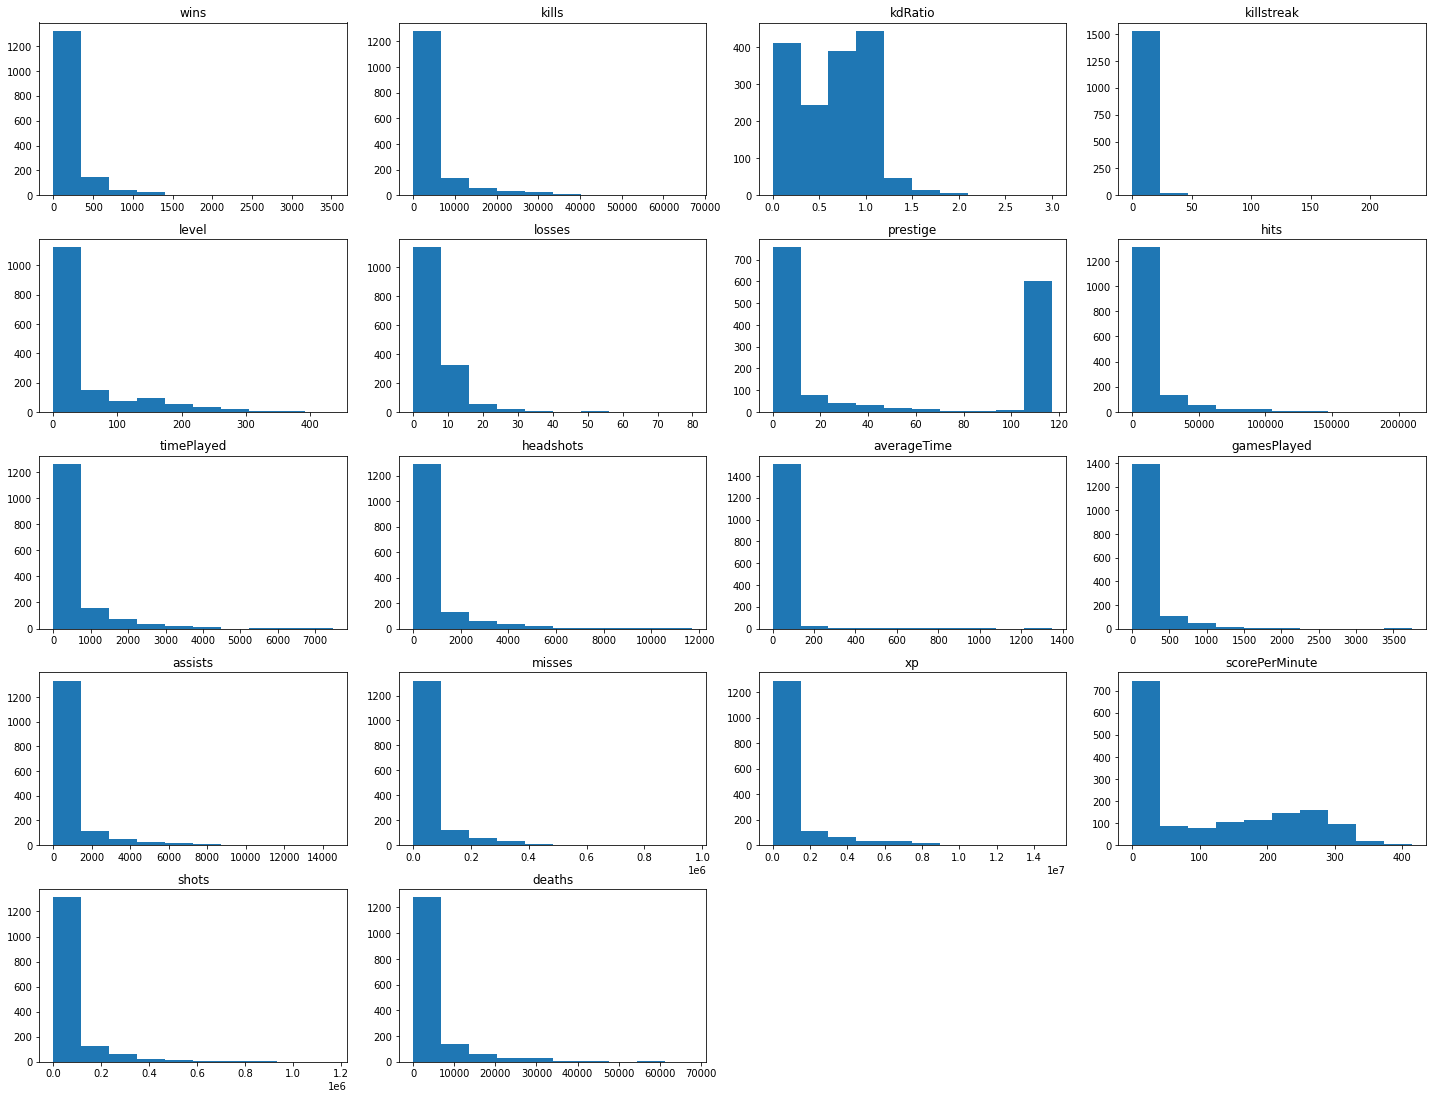

In [ ]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_cols):
                    plt.subplot(10,4,i+1)
                    plt.hist(df[variable])
                    plt.tight_layout()
                    plt.title(variable)
plt.show() 

##Standardize the data:

In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler().fit(df)
features=scale.transform(df)

In [ ]:
#creating df of scaled features
features_scaled=pd.DataFrame(features,columns=data.columns[1:19])
features_scaled.head()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,-0.506819,-0.473436,-1.480518,-0.677252,-0.635682,-0.713651,-0.923418,-0.450181,-0.541926,-0.483374,-0.259382,-0.455358,-0.451808,-0.463353,-0.486098,-0.925998,-0.463121,-0.485025
1,-0.506819,-0.473436,-1.480518,-0.677252,-0.635682,-0.713651,1.207967,-0.450181,-0.533019,-0.483374,-0.174650,-0.455358,-0.451808,-0.463353,-0.485709,-0.925998,-0.463121,-0.483022
2,-0.506819,-0.465111,0.915948,-0.677252,-0.518545,-0.713651,1.207967,-0.450181,-0.501210,-0.471110,0.127964,-0.455358,-0.451149,-0.463353,-0.459193,-0.925998,-0.463121,-0.477015
3,-0.496882,-0.473184,-0.550980,-0.677252,-0.635682,-0.713651,-0.923418,-0.450181,-0.538109,-0.483374,-0.223068,-0.455358,-0.451808,-0.463353,-0.485458,-0.925998,-0.463121,-0.484399
4,-0.506819,-0.473184,-1.015749,-0.677252,-0.635682,-0.713651,1.207967,-0.450181,-0.535564,-0.482607,-0.198859,-0.455358,-0.451808,-0.463353,-0.485541,-0.925998,-0.463121,-0.483773


###Finding the optimal value of 'k' using different methods:

**Using Silhouette score:**

In [ ]:
#create a list for different values of k
n_clusters=[2,3,4,5,6,7,8]

for k in n_clusters:
  cluster=KMeans(n_clusters=k,random_state=7)
  predict=cluster.fit_predict(features_scaled)

  score=silhouette_score(features_scaled,predict,random_state=7)
  print("For n_clusters = {}, silhouette_score is {}".format(k,score))

For n_clusters = 2, silhouette_score is 0.6111947491125224
For n_clusters = 3, silhouette_score is 0.4339997277925858
For n_clusters = 4, silhouette_score is 0.33651731825691683
For n_clusters = 5, silhouette_score is 0.3535111683563911
For n_clusters = 6, silhouette_score is 0.34637278732377746
For n_clusters = 7, silhouette_score is 0.39214636647342677
For n_clusters = 8, silhouette_score is 0.39525029136758527


**Using Elbow method:**

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
wss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init ='k-means++')
    kmeans.fit(features_scaled)
    wss.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

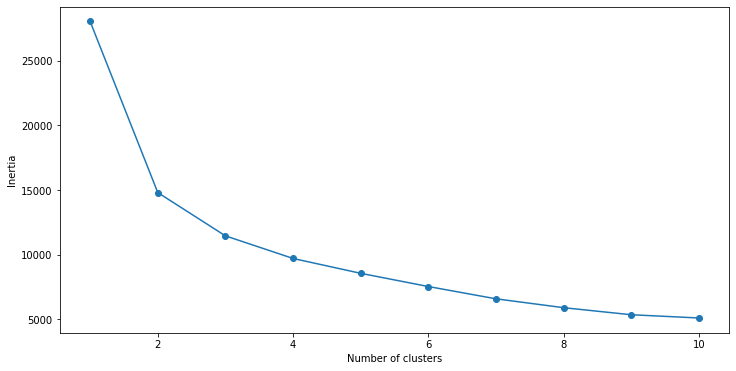

In [ ]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Kmeanslabel':range(1,11), 'WSS':wss})
plt.figure(figsize=(12,6))
plt.plot(frame['Kmeanslabel'], frame['WSS'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

##Model building:

**Model building using Kmeans Algorithm:**

In [ ]:
#building k means model for k=4
model=KMeans(n_clusters=4,random_state=7)

#fit the model
model.fit(features_scaled)

KMeans(n_clusters=4, random_state=7)

In [ ]:
#adding kmeanslabel column in dataframe..
features_scaled["Kmeanslabel"]=model.labels_
features_scaled.head()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Kmeanslabel
0,-0.506819,-0.473436,-1.480518,-0.677252,-0.635682,-0.713651,-0.923418,-0.450181,-0.541926,-0.483374,-0.259382,-0.455358,-0.451808,-0.463353,-0.486098,-0.925998,-0.463121,-0.485025,0
1,-0.506819,-0.473436,-1.480518,-0.677252,-0.635682,-0.713651,1.207967,-0.450181,-0.533019,-0.483374,-0.174650,-0.455358,-0.451808,-0.463353,-0.485709,-0.925998,-0.463121,-0.483022,0
2,-0.506819,-0.465111,0.915948,-0.677252,-0.518545,-0.713651,1.207967,-0.450181,-0.501210,-0.471110,0.127964,-0.455358,-0.451149,-0.463353,-0.459193,-0.925998,-0.463121,-0.477015,0
3,-0.496882,-0.473184,-0.550980,-0.677252,-0.635682,-0.713651,-0.923418,-0.450181,-0.538109,-0.483374,-0.223068,-0.455358,-0.451808,-0.463353,-0.485458,-0.925998,-0.463121,-0.484399,0
4,-0.506819,-0.473184,-1.015749,-0.677252,-0.635682,-0.713651,1.207967,-0.450181,-0.535564,-0.482607,-0.198859,-0.455358,-0.451808,-0.463353,-0.485541,-0.925998,-0.463121,-0.483773,0


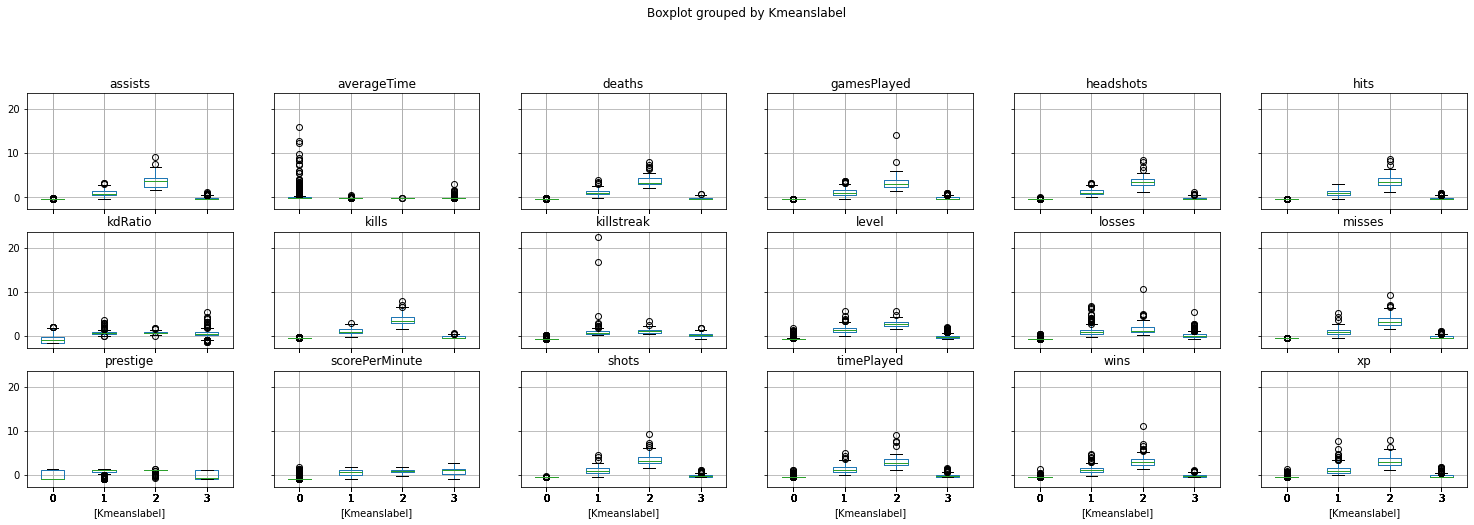

In [ ]:
#plotting boxplot based on kmeanslabel column
features_scaled.boxplot(by="Kmeanslabel",layout=(6,6),figsize=(25,15))
plt.show()

In [ ]:
#making shallow copy.....
data_output=features_scaled.copy(deep=True)

In [ ]:
#value counts of cluster formed.
np.unique(model.labels_,return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([764, 213,  61, 520]))

In [ ]:
#getting the centroids of every columns by cluster center command.
centers=pd.DataFrame(model.cluster_centers_,columns=data_output.columns[1:19])
centers.head()

,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Kmeanslabel
0,-0.479565,-0.462076,-0.677047,-0.599732,-0.540585,-0.639829,-0.289277,-0.448564,-0.479013,-0.470136,0.187780,-0.453126,-0.441914,-0.461261,-0.443985,-0.803295,-0.461109,-0.469120
1,1.229080,1.118168,0.831389,1.066237,1.522690,1.263220,0.844731,0.995927,1.308123,1.174317,-0.188736,1.082068,0.994668,1.077587,1.234757,0.584135,1.067306,1.127133
2,3.308570,3.797482,0.863893,1.201776,2.858263,1.769875,1.001181,3.746810,3.186454,3.658475,-0.222903,3.483328,3.782093,3.605973,3.196847,0.855739,3.650612,3.759165
3,-0.186979,-0.224597,0.552847,0.303419,-0.164769,0.215002,-0.038446,-0.188432,-0.205842,-0.219447,-0.172435,-0.186106,-0.201826,-0.186705,-0.228474,0.840571,-0.187954,-0.213425


In [ ]:
# Cluset profile
cluster_profile = data_output.groupby("Kmeanslabel").mean()

In [ ]:
# lest display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
Kmeanslabel,,,,,,,,,,,,,,,,,,
0,-0.479565,-0.462076,-0.677047,-0.599732,-0.540585,-0.639829,-0.289277,-0.448564,-0.479013,-0.470136,0.187780,-0.453126,-0.441914,-0.461261,-0.443985,-0.803295,-0.461109,-0.469120
1,1.229080,1.118168,0.831389,1.066237,1.522690,1.263220,0.844731,0.995927,1.308123,1.174317,-0.188736,1.082068,0.994668,1.077587,1.234757,0.584135,1.067306,1.127133
2,3.308570,3.797482,0.863893,1.201776,2.858263,1.769875,1.001181,3.746810,3.186454,3.658475,-0.222903,3.483328,3.782093,3.605973,3.196847,0.855739,3.650612,3.759165
3,-0.186979,-0.224597,0.552847,0.303419,-0.164769,0.215002,-0.038446,-0.188432,-0.205842,-0.219447,-0.172435,-0.186106,-0.201826,-0.186705,-0.228474,0.840571,-0.187954,-0.213425


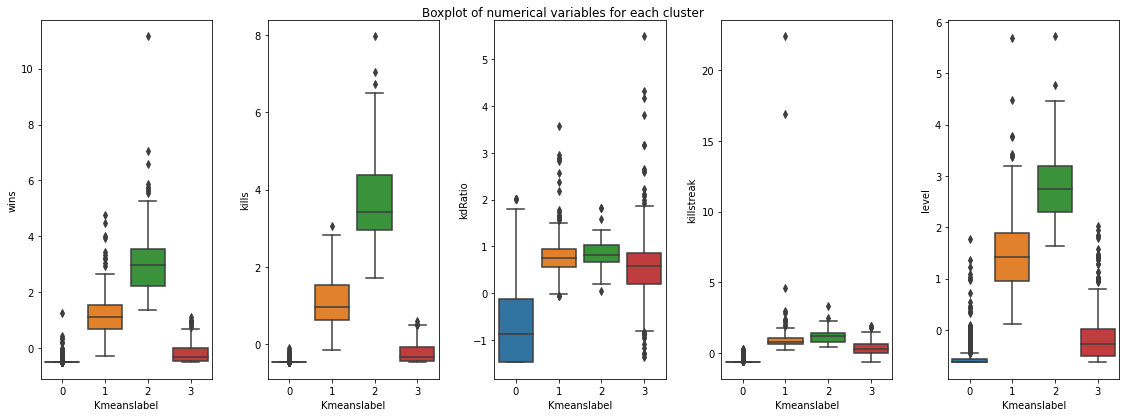

In [ ]:
#plotting boxplot for every numerical columns with respect to Kmeanslabel column
fig,axes=plt.subplots(1,5,figsize=(16,6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter=0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=data_output[numeric_cols[counter]],x=data_output['Kmeanslabel'])
    counter=counter+1

fig.tight_layout(pad=2.0)

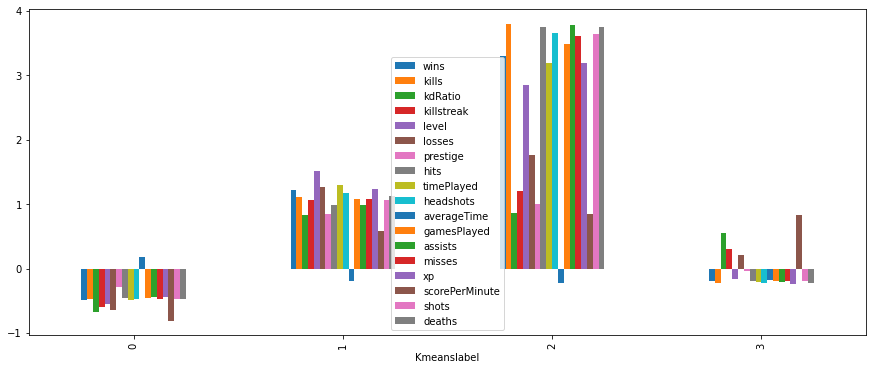

In [ ]:
#plotting barplot for all columns with respect to Kmeanslabel column
data_output.groupby("Kmeanslabel").mean().plot.bar(figsize=(15,6))

**Model building using Hirarcical Clustering Algorithm:**

In [ ]:
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram,linkage,cophenet
from sklearn.cluster import AgglomerativeClustering

In [ ]:
#selecting the scaled data for clustering
features_scaled.head()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Kmeanslabel
0,-0.506819,-0.473436,-1.480518,-0.677252,-0.635682,-0.713651,-0.923418,-0.450181,-0.541926,-0.483374,-0.259382,-0.455358,-0.451808,-0.463353,-0.486098,-0.925998,-0.463121,-0.485025,0
1,-0.506819,-0.473436,-1.480518,-0.677252,-0.635682,-0.713651,1.207967,-0.450181,-0.533019,-0.483374,-0.174650,-0.455358,-0.451808,-0.463353,-0.485709,-0.925998,-0.463121,-0.483022,0
2,-0.506819,-0.465111,0.915948,-0.677252,-0.518545,-0.713651,1.207967,-0.450181,-0.501210,-0.471110,0.127964,-0.455358,-0.451149,-0.463353,-0.459193,-0.925998,-0.463121,-0.477015,0
3,-0.496882,-0.473184,-0.550980,-0.677252,-0.635682,-0.713651,-0.923418,-0.450181,-0.538109,-0.483374,-0.223068,-0.455358,-0.451808,-0.463353,-0.485458,-0.925998,-0.463121,-0.484399,0
4,-0.506819,-0.473184,-1.015749,-0.677252,-0.635682,-0.713651,1.207967,-0.450181,-0.535564,-0.482607,-0.198859,-0.455358,-0.451808,-0.463353,-0.485541,-0.925998,-0.463121,-0.483773,0


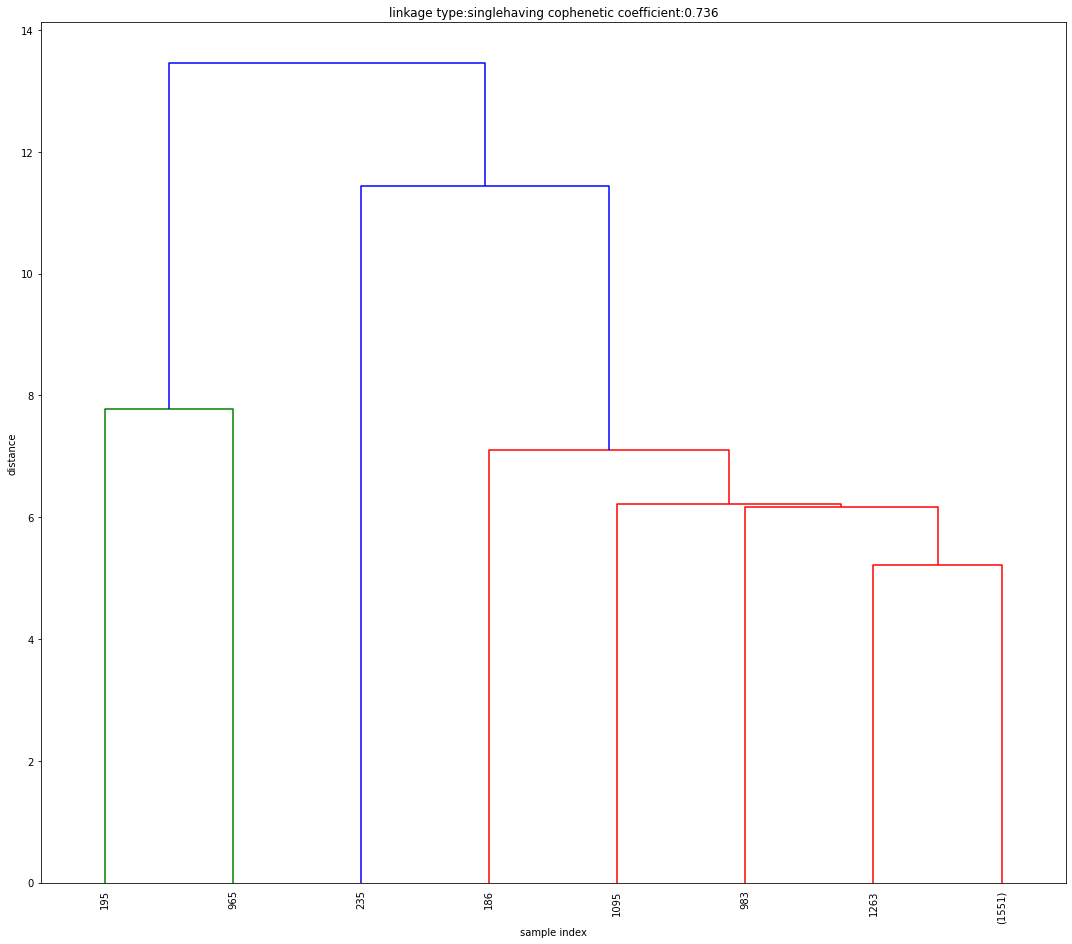

single 0.7364248053835011


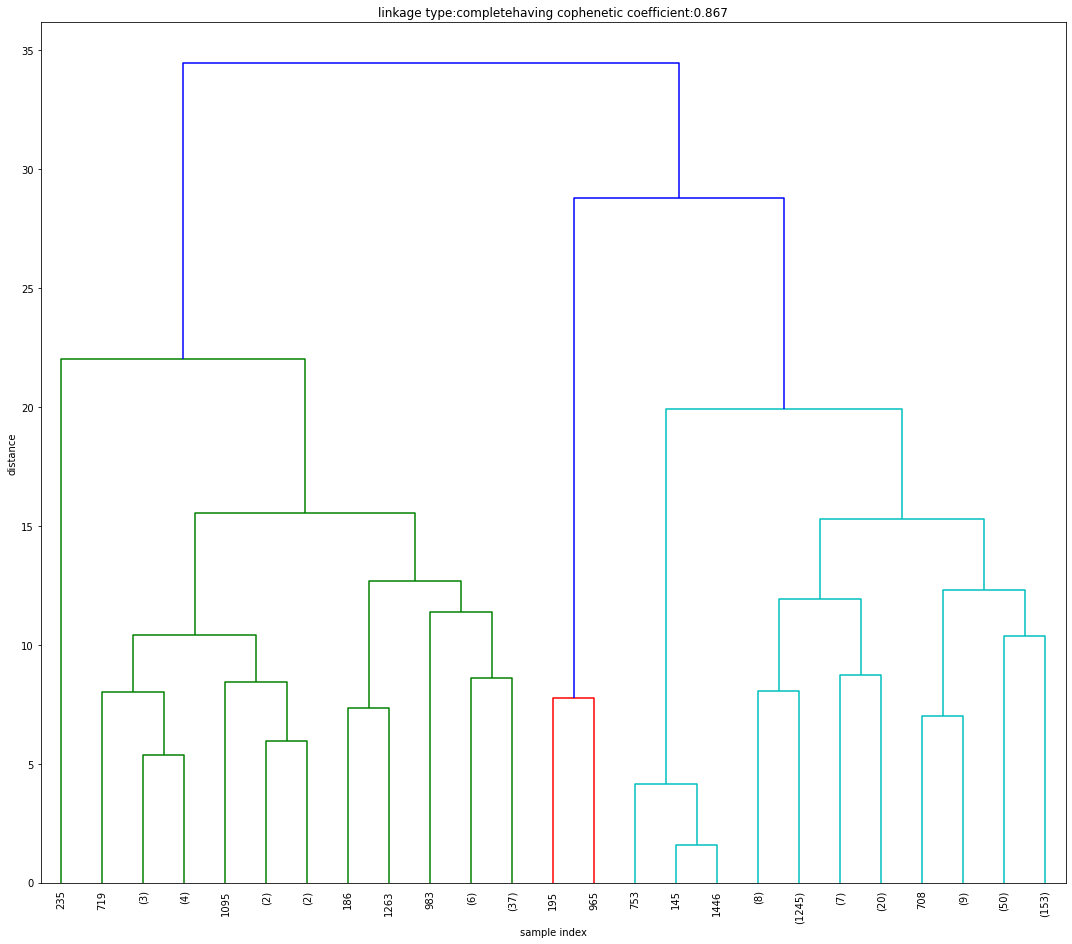

complete 0.8667023636054559


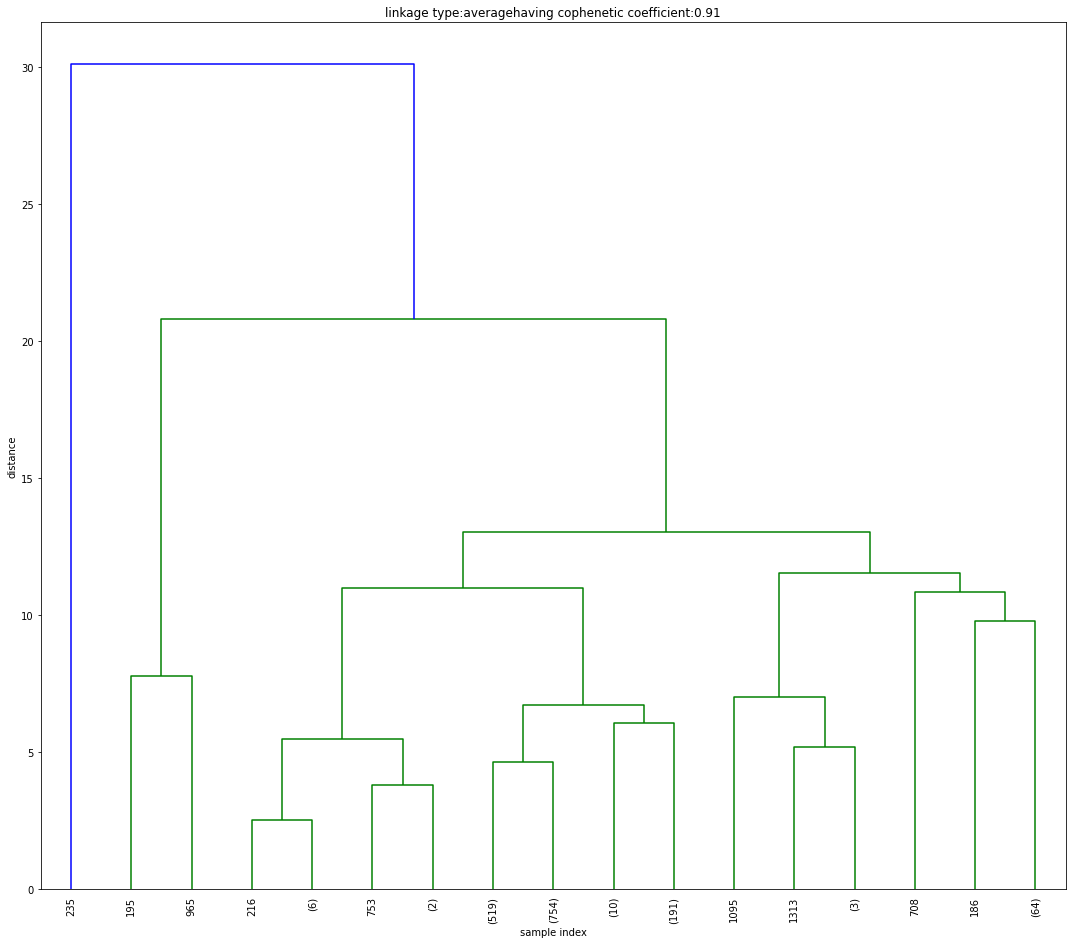

average 0.9099291312586535


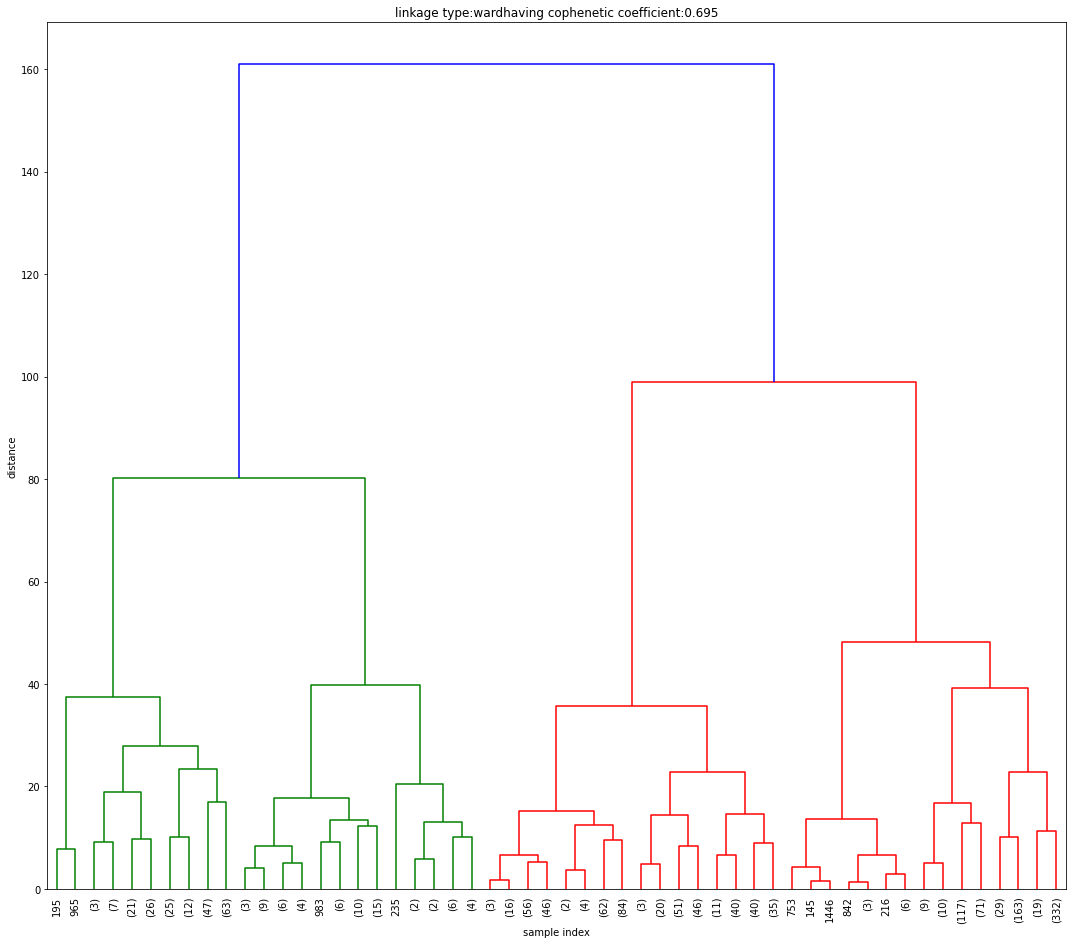

ward 0.6954184995885323


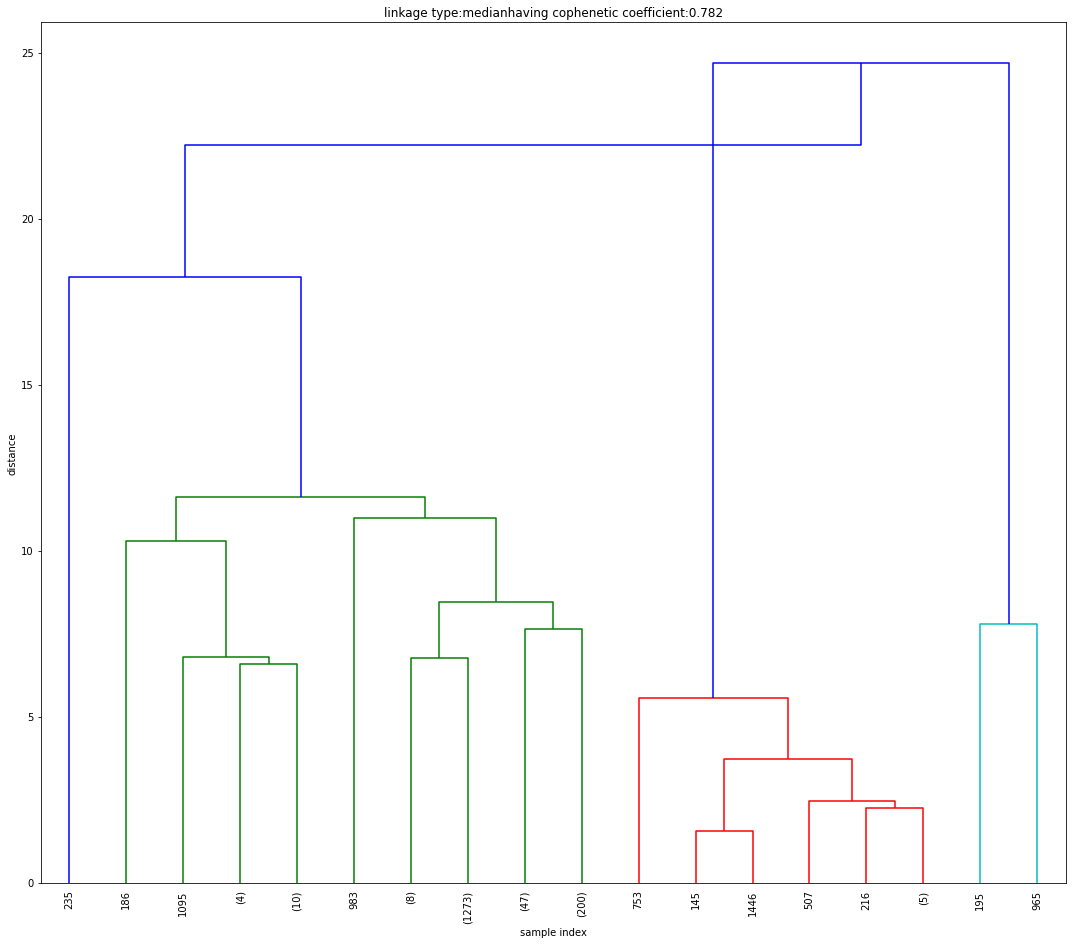

median 0.7816878792118911


In [ ]:
linkage_methods=['single','complete','average','ward','median']
results_cophenetic_coef=[]
for i in linkage_methods:
  plt.figure(figsize=(15,13))
  plt.xlabel('sample index')
  plt.ylabel('distance')
  z=linkage(features_scaled,i)
  cc,cophn_dist=cophenet(z,pdist(features_scaled))
  dendrogram(z,leaf_rotation=90.0,p=5,leaf_font_size=10,truncate_mode='level')
  plt.tight_layout()
  plt.title("linkage type:"+i+"having cophenetic coefficient:"+str(round(cc,3)))
  plt.show()
  results_cophenetic_coef.append((i,cc))
  print(i,cc)

**Build hirarcical clustering using 4 clusters:**

In [ ]:
# trying with K values as 6
HCmodel = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
HCmodel.fit(features_scaled)
features_scaled['HC_Clusters'] = HCmodel.labels_

In [ ]:
cluster_profile = features_scaled.groupby('HC_Clusters').mean()

In [ ]:
# lest display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,Kmeanslabel
HC_Clusters,,,,,,,,,,,,,,,,,,,
0,-0.482815,-0.465282,-0.699008,-0.601951,-0.563409,-0.647208,-0.317484,-0.448558,-0.496717,-0.474072,0.026922,-0.453105,-0.444222,-0.461249,-0.458707,-0.801054,-0.461098,-0.472805,0.000000
1,1.128585,1.081541,0.820495,1.064930,1.490126,1.289500,0.821759,0.963591,1.232306,1.144380,-0.188126,1.011887,0.978864,1.044981,1.194421,0.584603,1.034591,1.095195,1.009709
2,-0.187640,-0.224941,0.553939,0.301713,-0.165639,0.204961,-0.037039,-0.189100,-0.206656,-0.219659,-0.172309,-0.188151,-0.202645,-0.187534,-0.229107,0.839821,-0.188756,-0.214196,3.000000
3,4.493934,5.632826,0.840384,1.398427,3.543178,1.618507,0.972869,5.916458,4.304476,5.503759,-0.225045,5.005755,5.782873,5.622872,4.313006,0.973590,5.706596,5.669224,2.000000
4,-0.305467,-0.290313,0.499432,-0.480815,0.682108,-0.244500,1.221807,-0.448889,0.469433,-0.259299,8.805207,-0.454243,-0.318305,-0.461924,0.344724,-0.923368,-0.461711,-0.271689,0.000000
5,3.034722,3.008892,0.891516,1.134329,2.571484,1.713697,1.043628,2.844436,2.866633,2.868302,-0.220490,2.968586,2.859378,2.780082,2.728985,0.792934,2.806057,2.943080,1.851852


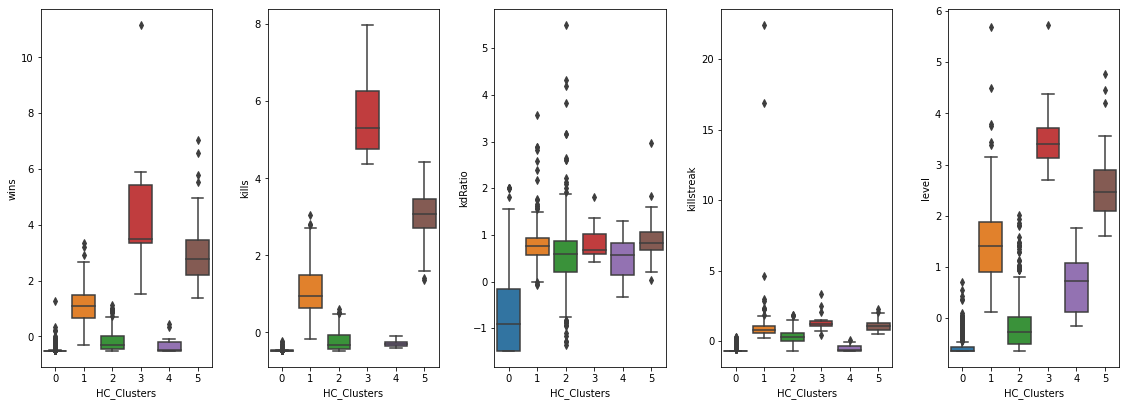

In [ ]:
num_col=features_scaled.select_dtypes(include=np.number).columns
fig,axes=plt.subplots(1,5,figsize=(16,6))
#fig.subtitle("BoxPlot of numerical variable for each cluster")
counter=0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=features_scaled[num_col[counter]],x=features_scaled["HC_Clusters"])
    counter=counter+1
fig.tight_layout(pad=2.0)

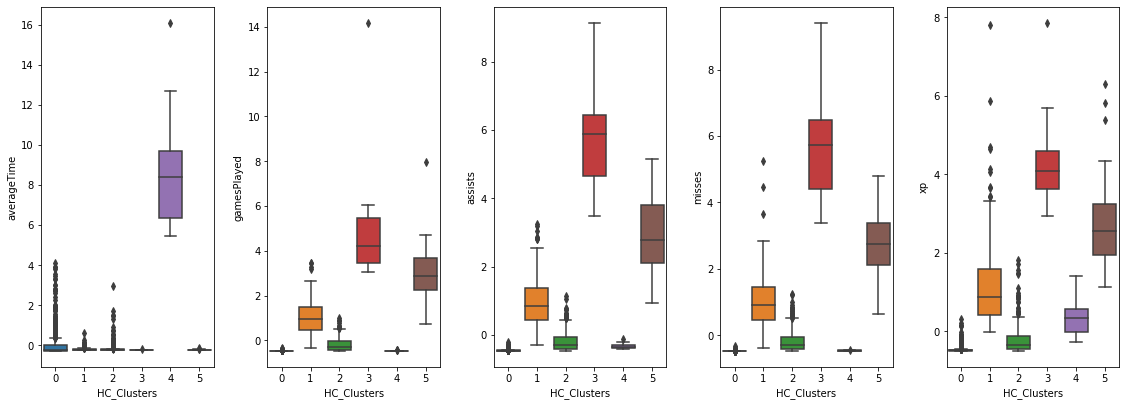

In [ ]:
fig,axes=plt.subplots(1,5,figsize=(16,6))
#fig.subtitle("BoxPlot of numerical variable for each cluster")
counter=10
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=features_scaled[num_col[counter]],x=features_scaled["HC_Clusters"])
    counter=counter+1
fig.tight_layout(pad=2.0)

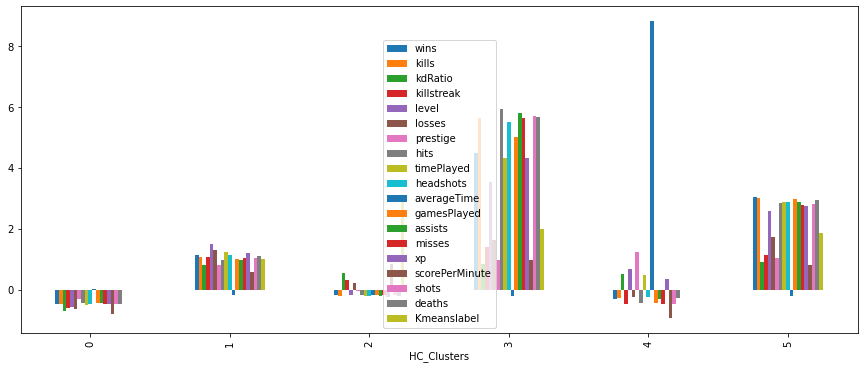

In [ ]:
features_scaled.groupby("HC_Clusters").mean().plot.bar(figsize=(15,6))